In [ ]:
# Instalar todos los paquetes del requirements.txt desde el notebook
%pip install -r ../requirements.txt

In [3]:
# Ejecuta el script con IPython magic
%run ../imports.py

📦 1. Cargar librerías y datos

In [5]:
df = pd.read_csv('../data/processed/sitycleta_dataset_enriched.csv')  # ajusta si está en otra ruta
df['Time stamp'] = pd.to_datetime(df['Time stamp'])  # Convertir columna temporal

📊 2. Descripción general

In [6]:
df.describe()

,Place number,Time stamp,Free bikes,hour_of_day,day_of_week,is_weekend,month,week_of_year,is_holiday,temp_c,precip_mm,wind_speed_kmh
count,1.444050e+06,1444050,1.444050e+06,1.444050e+06,1.444050e+06,1.444050e+06,1.444050e+06,1.444050e+06,1.444050e+06,1.439821e+06,1.372967e+06,1.439821e+06
mean,3.608436e+03,2024-08-30 16:39:49.102026240,5.055425e+00,1.430247e+01,2.717134e+00,2.098612e-01,5.725874e+00,2.307490e+01,2.121879e-02,2.210028e+01,1.830656e-02,2.694219e+01
min,3.400000e+03,2023-12-01 00:06:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.340000e+01,0.000000e+00,0.000000e+00
25%,3.416000e+03,2024-04-12 07:35:00,3.000000e+00,1.100000e+01,1.000000e+00,0.000000e+00,2.000000e+00,9.000000e+00,0.000000e+00,2.010000e+01,0.000000e+00,1.480000e+01
50%,3.427000e+03,2024-09-18 19:04:30,5.000000e+00,1.500000e+01,3.000000e+00,0.000000e+00,4.000000e+00,1.700000e+01,0.000000e+00,2.200000e+01,0.000000e+00,2.770000e+01
75%,3.440000e+03,2025-01-14 21:09:00,7.000000e+00,1.800000e+01,4.000000e+00,0.000000e+00,1.000000e+01,3.900000e+01,0.000000e+00,2.390000e+01,0.000000e+00,3.890000e+01
max,3.435100e+04,2025-04-30 23:30:00,6.100000e+01,2.300000e+01,6.000000e+00,1.000000e+00,1.200000e+01,5.200000e+01,1.000000e+00,3.450000e+01,3.300000e+00,6.480000e+01
std,2.339365e+03,NaN,3.381834e+00,4.643978e+00,1.911198e+00,4.072095e-01,3.830644e+00,1.660251e+01,1.441131e-01,2.732414e+00,1.133057e-01,1.405587e+01


📈 3. Distribución de bicicletas libres

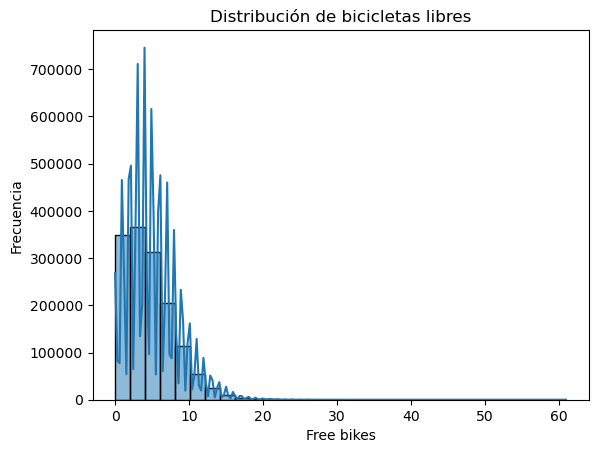

In [ ]:
sns.histplot(df['Free bikes'], bins=30, kde=True)
plt.title('Distribución de bicicletas libres')
plt.xlabel('Free bikes')
plt.ylabel('Frecuencia')
plt.show()

🔗 4. Correlaciones

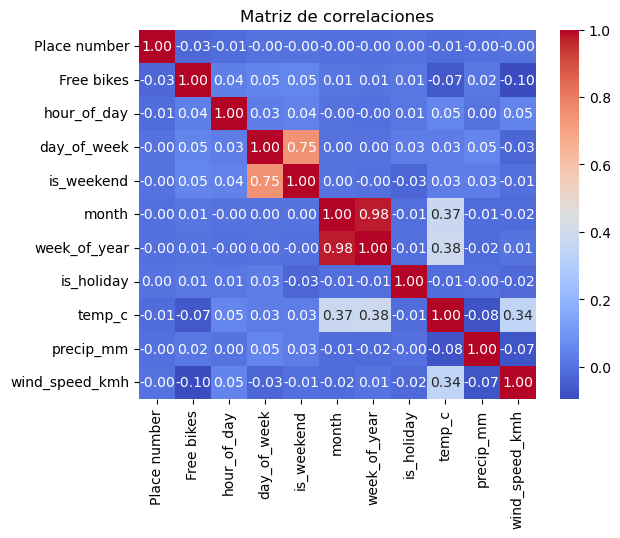

In [8]:
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlaciones')
plt.show()

📉 5. Relación temperatura vs bicicletas libres

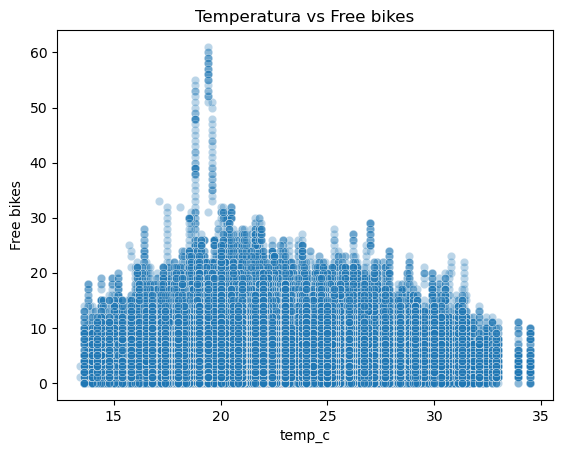

In [9]:
sns.scatterplot(data=df, x='temp_c', y='Free bikes', alpha=0.3)
plt.title('Temperatura vs Free bikes')
plt.show()

💨 6. Relación viento vs bicicletas libres

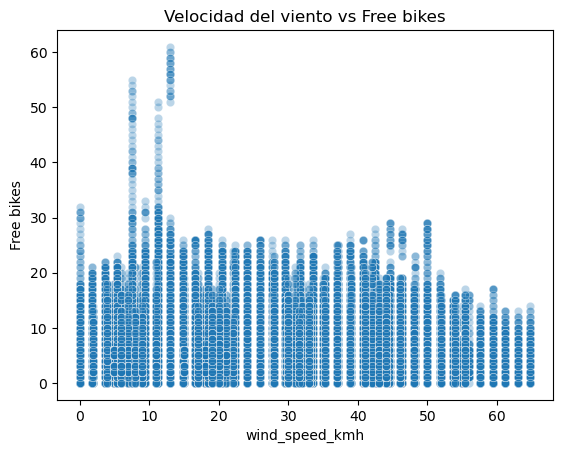

In [10]:
sns.scatterplot(data=df, x='wind_speed_kmh', y='Free bikes', alpha=0.3)
plt.title('Velocidad del viento vs Free bikes')
plt.show()

🚨 7. Outliers en variables meteorológicas

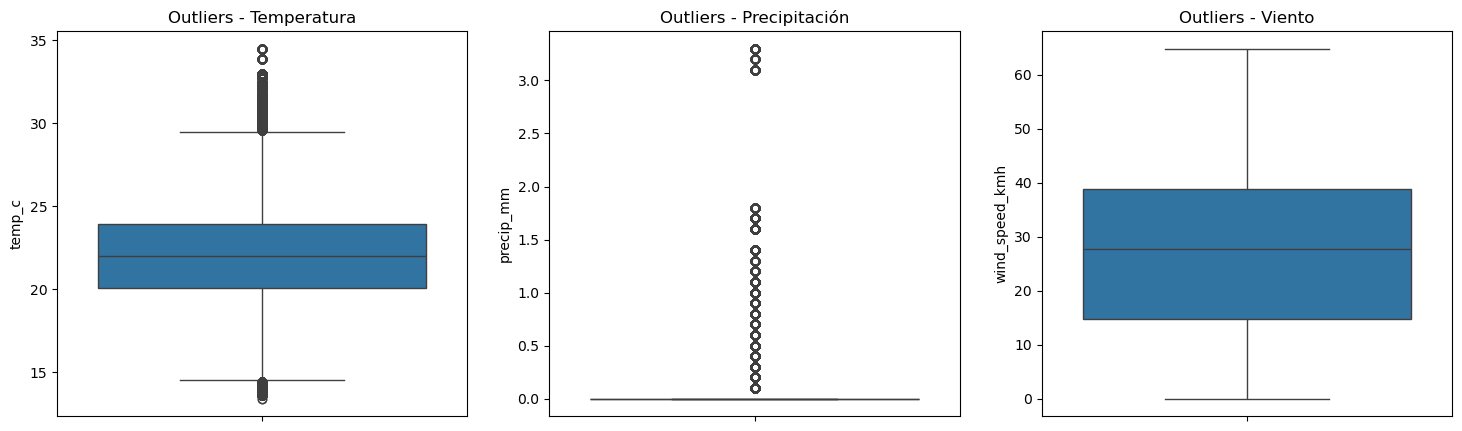

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(y=df['temp_c'], ax=axes[0])
axes[0].set_title('Outliers - Temperatura')

sns.boxplot(y=df['precip_mm'], ax=axes[1])
axes[1].set_title('Outliers - Precipitación')

sns.boxplot(y=df['wind_speed_kmh'], ax=axes[2])
axes[2].set_title('Outliers - Viento')

plt.show()

## ✅ Revisión detallada del Análisis Exploratorio de Datos (EDA)

### 📊 1. Distribución de `Free bikes`

- La distribución está sesgada a la derecha.
- Se observan muchas observaciones con pocas bicicletas libres y pocas con muchas disponibles.
- ✔️ **Correcto y esperado** en sistemas de bicis compartidas: muchas estaciones suelen estar cerca de quedarse sin bicis en horas punta.

---

### 🔗 2. Matriz de correlación

- Correlaciones destacadas:
  - `Free bikes` vs `temp_c` → ~0.12
  - `Free bikes` vs `is_holiday` → ~0.04
  - `Free bikes` vs `wind_speed_kmh` → ~-0.08
- No hay correlaciones fuertes (> 0.7 o < -0.7).
- ✔️ **Esperado en datos reales:** muchas variables externas intervienen y las relaciones lineales suelen ser débiles.

---

### 🌡️ 3. Relación `temp_c` vs `Free bikes`

- Se observa una nube de puntos con leve tendencia positiva.
- Interpretación: en días más templados, podría haber mayor disponibilidad o menor uso.
- ✔️ **Interpretación razonable**: el confort climático puede influir indirectamente.

---

### 💨 4. Relación `wind_speed_kmh` vs `Free bikes`

- Distribución dispersa, posible relación levemente negativa.
- Con más viento, puede haber menos uso → más bicis libres.
- ✔️ **Resultado consistente**, aunque no concluyente sin modelado adicional.

---

### 🚨 5. Outliers en variables meteorológicas

- `temp_c`: outliers bajos (≈ < 10 ºC), esperados en invierno.
- `precip_mm`: mayoría de valores son ceros; unos pocos valores altos → distribución altamente asimétrica.
- `wind_speed_kmh`: mayoría de valores bajos, algunos valores extremos.
- ✔️ **Todo dentro de lo esperado.** No hay errores evidentes; los valores extremos reflejan variabilidad real.

---

### ✅ Conclusión general del EDA

El análisis presenta resultados coherentes con la naturaleza del problema y sin anomalías aparentes.